In [4]:
!pip install word2number

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from word2number import w2n

In [6]:
df=pd.read_csv('/content/drive/MyDrive/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [7]:
print(w2n.word_to_num("eleven"))

11


In [8]:
df.experience=df.experience.fillna('zero')
df.experience
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [9]:
df.experience=df.experience.apply(w2n.word_to_num)
df.experience

0     0
1     0
2     5
3     2
4     7
5     3
6    10
7    11
Name: experience, dtype: int64

In [10]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [11]:
df=df.rename(columns={'test_score(out of 10)':'TestscoreOf10','interview_score(out of 10)':'InterviewScoreOf10','salary($)':'salary_dollars'})
df

,experience,TestscoreOf10,InterviewScoreOf10,salary_dollars
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [12]:
Test_score_10_mean=df.TestscoreOf10.mean()
Test_score_10_mean

7.857142857142857

In [13]:
import math
test_score = math.floor(Test_score_10_mean)

In [14]:
df.TestscoreOf10=df.TestscoreOf10.fillna(test_score)
df

,experience,TestscoreOf10,InterviewScoreOf10,salary_dollars
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [15]:
reg=LinearRegression()

In [16]:
reg.fit(df[['experience','TestscoreOf10','InterviewScoreOf10']],df.salary_dollars)

LinearRegression()

In [17]:
reg.predict([[2,9,6]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([53713.86677124])

In [18]:
reg.predict([[12,10,10]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([93747.79628651])

In [19]:
r2_score=reg.score(df[['experience','TestscoreOf10','InterviewScoreOf10']],df.salary_dollars)
r2_score

0.977013901427314

In [20]:
import matplotlib.pyplot as plt

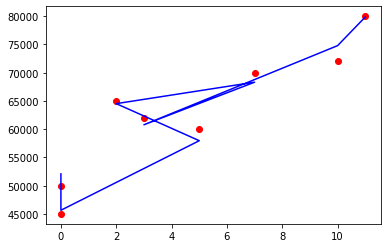

In [21]:
#plt.figure(figsize=())
plt.scatter(df['experience'],df.salary_dollars,color='red')
plt.plot(df['experience'],reg.predict(df[['experience','TestscoreOf10','InterviewScoreOf10']]),color='blue')

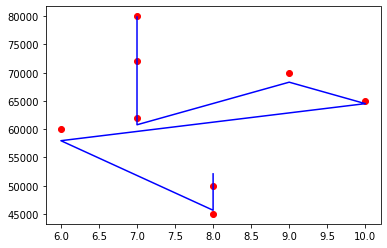

In [22]:
plt.scatter(df['TestscoreOf10'],df.salary_dollars,color='red')
plt.plot(df['TestscoreOf10'],reg.predict(df[['experience','TestscoreOf10','InterviewScoreOf10']]),color='blue')

In [23]:
!pip install sklearn

In [24]:
#saving and loading this model using pickle

In [25]:
import pickle

In [26]:
with open('model_pkl','wb') as files:
  pickle.dump(reg, files)

In [27]:
with open('model_pkl','rb') as files:
  n=pickle.load(files)

In [28]:
n.predict([[2,3,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([29648.59934187])